In [43]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, make_scorer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [44]:
df = pd.read_csv('C:\\Users\\PS\\Downloads\\Flipkart Sentiment Analysis\web scrping, EDA and Modeling\\cleaned_data.csv')

In [45]:
df.dropna(inplace=True)

In [46]:
X= df['cleaned_review_text']
y = df['sentiment']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
tfidf_vectorizer = TfidfVectorizer()

In [49]:
print(X_train)

19051    believe best packaged tea market taste somethi...
17663    great product great deal tata tea gold best ti...
19770    tata gold v tata tea premiumtata tea premium g...
7365                   best shuttle intermediate levelread
8242                              nice orignal productread
                               ...                        
11284    nice super qwality tea taste greater really em...
11964    nice super qwality tea taste greater really em...
5390     multiple small small hole cork doesnt look lik...
860                                       nice shuttleread
15795    great test great quality great price point tim...
Name: cleaned_review_text, Length: 15938, dtype: object


In [50]:
tfidf_vectorizer.fit(X_train)

TfidfVectorizer()

In [51]:
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_test)

In [52]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [53]:
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [54]:
rf_pred = rf_model.predict(X_val_tfidf)

In [55]:
accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy)

# Calculate F1-Score
f1 = f1_score(y_test, rf_pred, pos_label='Positive')
print("F1-Score:", f1)

# Print classification report
print(classification_report(y_test, rf_pred))

Accuracy: 0.9299874529485571
F1-Score: 0.9601826744683888
              precision    recall  f1-score   support

    Negative       0.86      0.60      0.71       566
    Positive       0.94      0.98      0.96      3419

    accuracy                           0.93      3985
   macro avg       0.90      0.79      0.84      3985
weighted avg       0.93      0.93      0.92      3985



In [56]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


In [57]:
f1_scorer = make_scorer(f1_score, pos_label='Positive')

In [58]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=f1_scorer, cv=5)

In [59]:
grid_search.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring=make_scorer(f1_score, response_method='predict', pos_label=Positive))

In [60]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best F1-Score: 0.9629063193581512


In [61]:
best_rf_model = grid_search.best_estimator_

In [62]:
best_rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(min_samples_split=10, random_state=42)

In [63]:
y_pred_val = best_rf_model.predict(X_val_tfidf)
f1_val = f1_score(y_test, y_pred_val, pos_label='Positive')

In [64]:

print("F1 score on validation set:", f1_val)


F1 score on validation set: 0.9596463710252389


In [65]:
feature_importance = best_rf_model.feature_importances_

In [66]:
feature_names = tfidf_vectorizer.get_feature_names_out()

In [67]:
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

In [68]:
feature_df = feature_df.sort_values(by='Importance', ascending=False)

In [69]:
N = 10

In [70]:
top_features = feature_df.head()

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

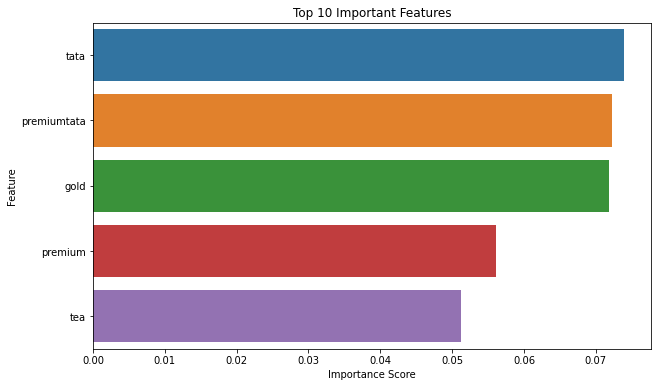

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top ' + str(N) + ' Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

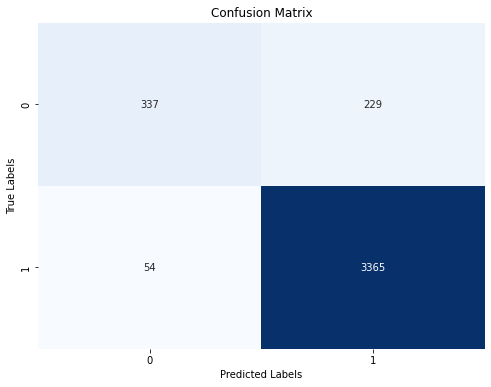

In [74]:
# Import confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_val)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [75]:
import joblib


model_file_path = 'best_rf_model.joblib'
vectorizer_file_path = 'tfidf_vectorizer.joblib'

# Save the trained model
joblib.dump(best_rf_model, model_file_path)

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, vectorizer_file_path)





['tfidf_vectorizer.joblib']